# Predicting which customers are at high risk of churn

### Problem Statement

One of the major challenges faced by telecom companies is customer churn, which is the loss of customers to competitors. Customer churn is costly for telcos, as they have to spend more money on acquiring new customers than retaining eXisting ones. Moreover, customer churn reduces the profitability and loyalty of telcos. Therefore, telcos need to identify the customers who are at risk of churning and take proactive actions to prevent them from leaving. This can be done by using data analysis and machine learning techniques to predict customer churn and offer personalized incentives and services to retain them.

## Data Description

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1) Customers who left within the last month – the column is called Churn
    
2) Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
    
3) Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    
4) Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
#importing the libraries and navigating the path needed for analysis of the dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
%cd "C:\Users\Thor_after_infinity\Desktop\ML Datasets\Telecom Churn"

C:\Users\Thor_after_infinity\Desktop\ML Datasets\Telecom Churn


In [2]:
churndf=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") # importing train

### EXploratory Data Analysis & Date Preprocessing

In [3]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churndf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churndf.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
churndf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
churndf.isnull().sum() # There are no missing values.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64


Text(0.5, 1.0, 'Differernt genders using the telecom service')

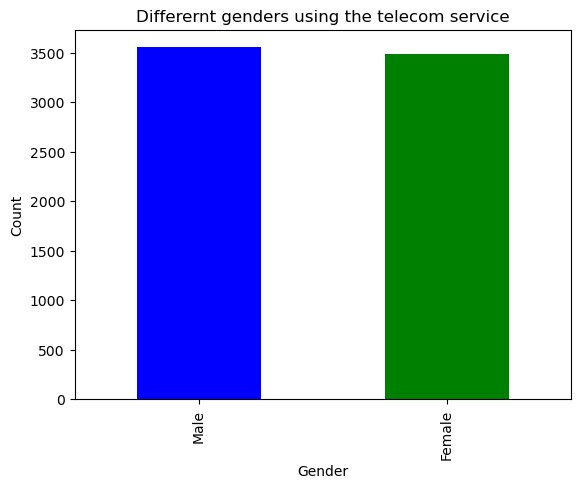

In [8]:
print(churndf.gender.value_counts())
churndf.gender.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Differernt genders using the telecom service')

The dataset reveals that the telecom industry is gender-inclusive, with a balanced proportion of male and female employees. The only distinctive feature of the dataset is the uniqueness of each individual.

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Text(0.5, 1.0, 'How many Senior Citizen using the telecom service')

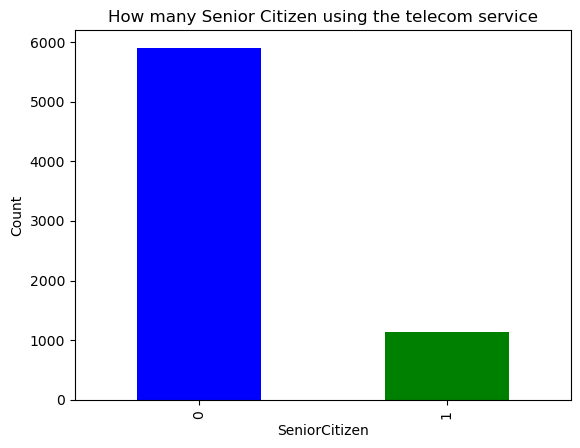

In [9]:
print(churndf.SeniorCitizen.value_counts())
churndf.SeniorCitizen.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.title('How many Senior Citizen using the telecom service')

In [10]:
#As the Senior Citizens variable is categorical, hence changing the data type to 'object'
churndf.SeniorCitizen=churndf.SeniorCitizen.astype('object')

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Text(0.5, 1.0, 'How many Senior Citizen using the telecom service')

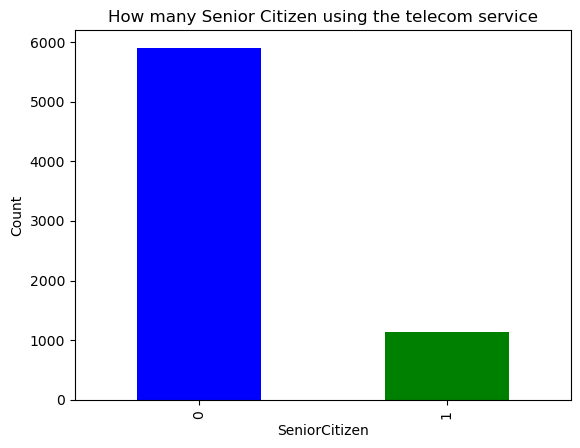

In [11]:
print(churndf.SeniorCitizen.value_counts())
churndf.SeniorCitizen.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.title('How many Senior Citizen using the telecom service')

The data shows that most of the customers are not senior citizens, as only 1142 of them (16.2%) belong to this category. However, this group also has a high churn rate of 16%, which means they are likely to stop using the company's services or reduce their usage significantly.

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Text(0.5, 1.0, 'How many  are Partner using the telecom service')

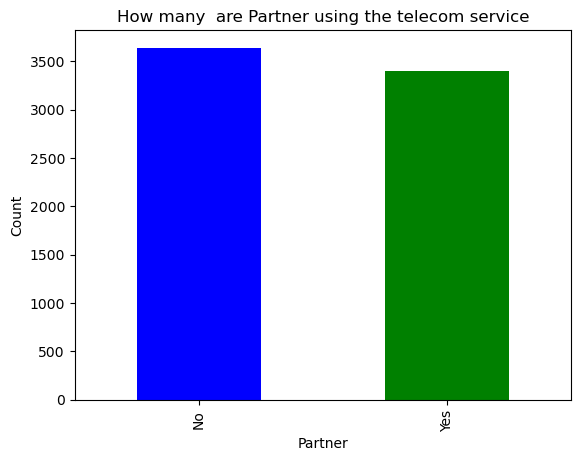

In [12]:
print(churndf.Partner.value_counts())
churndf.Partner.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('How many  are Partner using the telecom service')

The data shows that the customers have a similar proportion of partnered and individual connections. This implies that the type of connection does not affect the churn rate of the customers.

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Text(0.5, 1.0, 'How many Dependents using the telecom service')

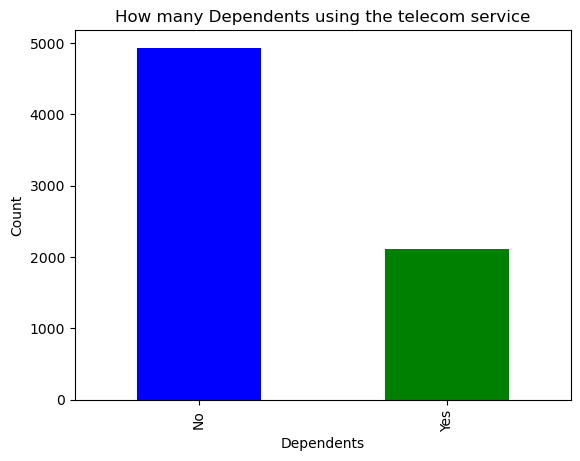

In [13]:
print(churndf.Dependents.value_counts())
churndf.Dependents.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('How many Dependents using the telecom service')

A possible interpretation of the data is that most of the customers are self-reliant and have their own income sources, while about 2110 customers, or 30 percent, rely on others for financial support. This group may include students and senior citizens who do not have regular jobs or savings.

In [14]:
churndf.tenure.describe() #NUmerical Variable

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The average customer tenure is 32, which indicates a high level of satisfaction. However, some customers still choose to leave despite this long-term relationship. This suggests that there are other factors that influence their decision, such as the availability of better or cheaper alternatives.

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are using the PhoneService')

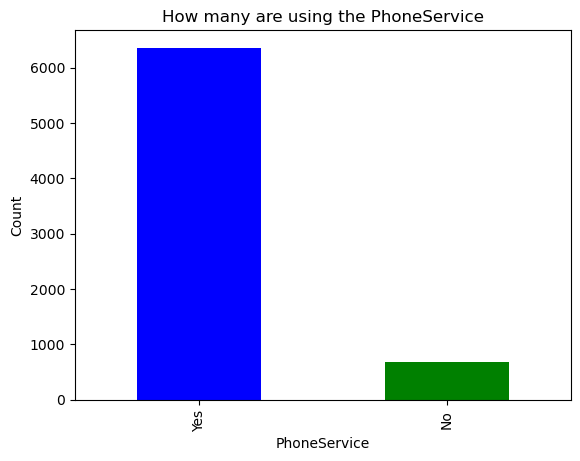

In [15]:
print(churndf.PhoneService.value_counts())
churndf.PhoneService.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.title('How many are using the PhoneService')

According to the dataset, phone service is available to 90% of the population, while 10% lack this service. This means that out of 7000 people, 700 do not have phone service and may use other alternatives only occasionally.

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are having the MultipleLines')

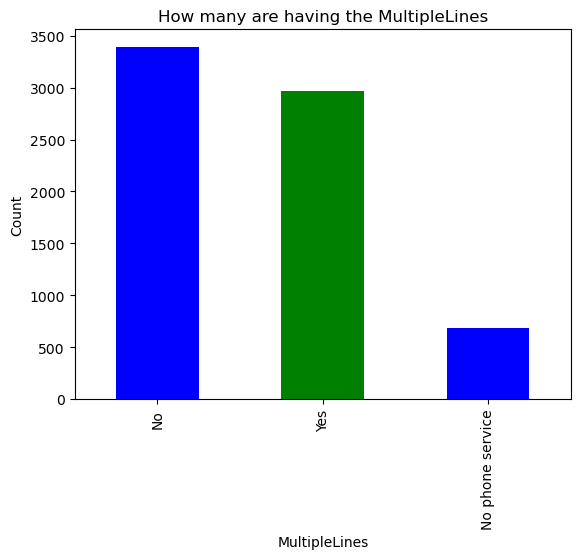

In [16]:
print(churndf.MultipleLines.value_counts())
churndf.MultipleLines.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.title('How many are having the MultipleLines')

The data analysis shows that phone service usage is not uniform among the customers. Excluding those who do not have any phone service, the rest of the customers are split between single line and multiline phone services. There is no significant difference in the proportion of customers who use either option.

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are having the InternetService')

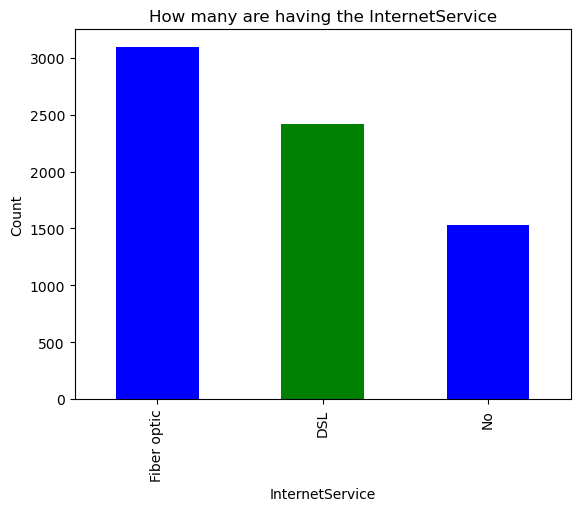

In [17]:
print(churndf.InternetService.value_counts())
churndf.InternetService.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('How many are having the InternetService')

The dataset shows that Fibre Optic is the most popular choice for internet connection among the customers, as it offers the fastest and highest bandwidth communication medium. However, Fibre Optic is also expensive, so some customers prefer DSL, which stands for Digital Subscriber Line. DSL is cheaper and more widely available than Fibre Optic, but it has lower speed and bandwidth. Surprisingly, 21 percent of the customers do not have any internet connection at all.

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are having the OnlineSecurity')

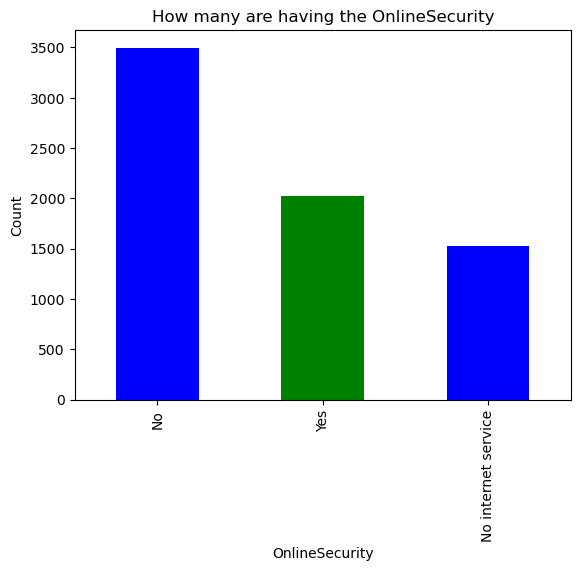

In [18]:
print(churndf.OnlineSecurity.value_counts())
churndf.OnlineSecurity.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.title('How many are having the OnlineSecurity')

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are having the OnlineBackup')

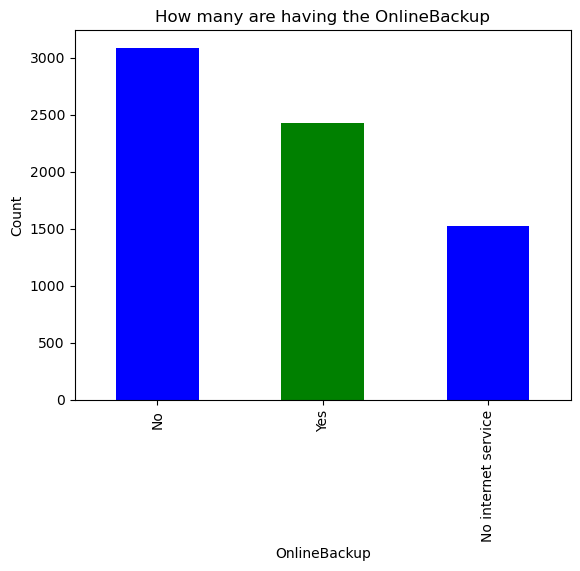

In [19]:
print(churndf.OnlineBackup.value_counts())
churndf.OnlineBackup.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('OnlineBackup')
plt.ylabel('Count')
plt.title('How many are having the OnlineBackup')

The customers who have internet services may also have other services such as 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies'. These services may not affect our churn dataset significantly.

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


Text(0.5, 1.0, 'How many are having the different Contracts')

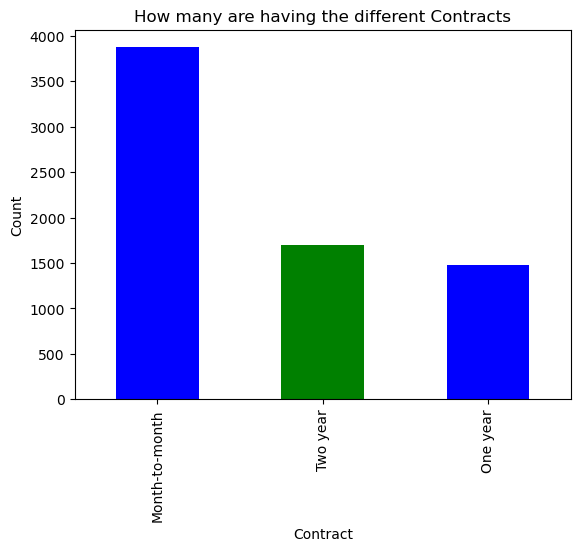

In [20]:
print(churndf.Contract.value_counts())
churndf.Contract.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('How many are having the different Contracts')

The dataset shows that most customers prefer the month-to-month contract option. This could be because they find it hard to pay a large amount at once for a year or two of service.

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


Text(0.5, 1.0, 'Payment Method customers adopt')

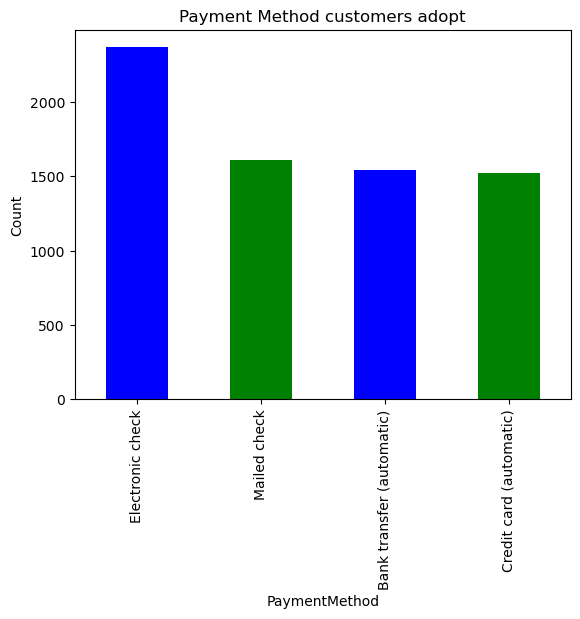

In [21]:
print(churndf.PaymentMethod.value_counts())
churndf.PaymentMethod.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('Payment Method customers adopt')

The data analysis shows that customers prefer electronic cheque as a payment method for the services. They feel more secure with this option than other alternatives.

In [22]:
churndf['TotalCharges']=pd.to_numeric(churndf['TotalCharges'],errors='coerce')
#as the total charges is of numeriv variable, hence chaging the datatype to numeric

In [23]:
churndf.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [24]:
churndf['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [25]:
churndf['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [26]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
churndf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
churndf=churndf.dropna() # Since the null values are less than 1% we are droping the null values.

In [29]:
churndf.info() #No null values.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

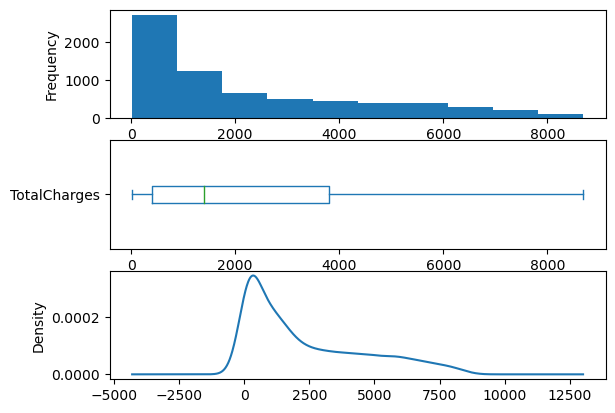

In [30]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
churndf['TotalCharges'].plot(kind='hist',ax=ax[0])
churndf['TotalCharges'].plot(kind='box',vert=False,ax=ax[1])
churndf['TotalCharges'].plot(kind='kde',ax=ax[2])

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

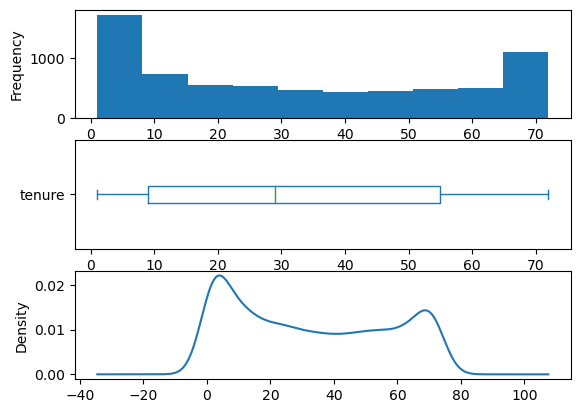

In [31]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
churndf['tenure'].plot(kind='hist',ax=ax[0])
churndf['tenure'].plot(kind='box',vert=False,ax=ax[1])
churndf['tenure'].plot(kind='kde',ax=ax[2])

In [32]:
churndf.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

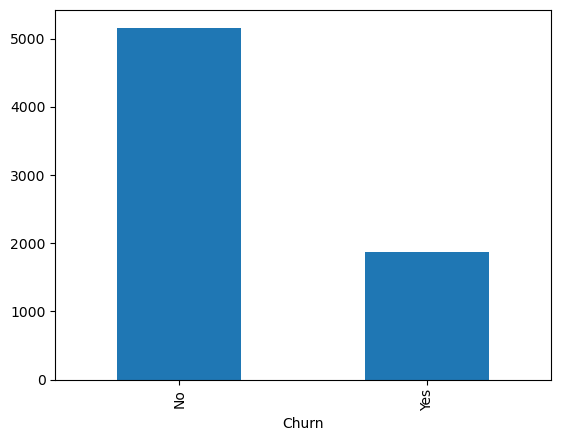

In [33]:
churndf.Churn.value_counts().plot(kind='bar')

# cross tabulation

In [34]:
pd.crosstab(churndf.Churn,churndf.gender)
#Churn & gender

gender,Female,Male
Churn,,
No,2544,2619
Yes,939,930


<Axes: xlabel='Churn'>

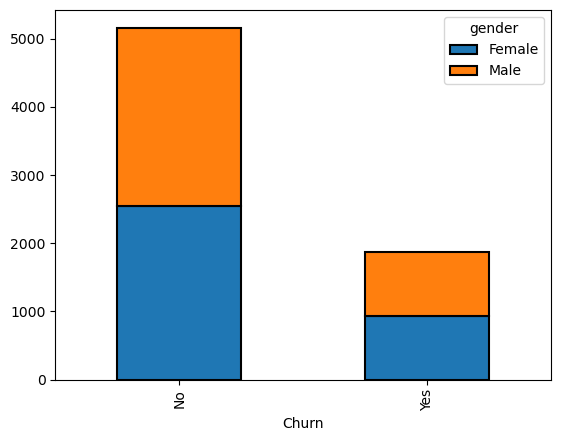

In [35]:
pd.crosstab(churndf.Churn,churndf.gender).plot(kind='bar',stacked=True,edgecolor='k',linewidth=1.5)
#Churn & gender

(Churn
 No     5163
 Yes    1869
 Name: count, dtype: int64,
 <Axes: xlabel='gender'>)

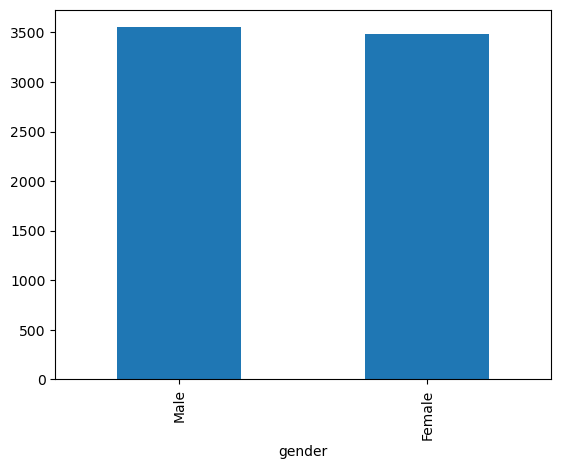

In [36]:
churndf.Churn.value_counts(),churndf.gender.value_counts().plot(kind='bar',stacked=True)

In [37]:
pd.crosstab(churndf.Churn,churndf.Contract)

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


<Axes: xlabel='Churn'>

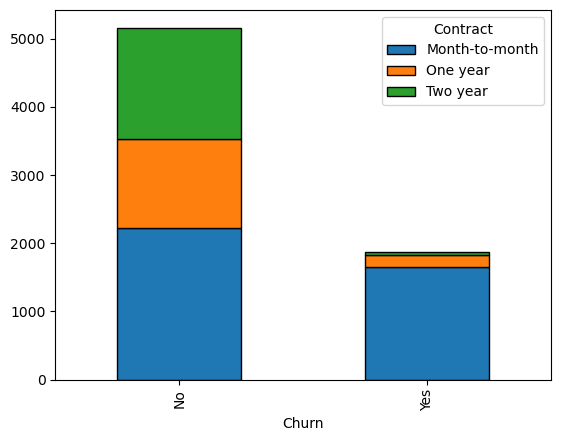

In [38]:
pd.crosstab(churndf.Churn,churndf.Contract).plot(kind='bar',stacked=True,edgecolor='k')

# groupby()

In [39]:
churndf.tenure.groupby(churndf.gender).mean()

gender
Female    32.290841
Male      32.550296
Name: tenure, dtype: float64

In [40]:
churndf.tenure.groupby(churndf.Contract).mean()

Contract
Month-to-month    18.036645
One year          42.073370
Two year          57.071810
Name: tenure, dtype: float64

In [41]:
churndf.TotalCharges.groupby(churndf.InternetService).mean()

InternetService
DSL            2119.789259
Fiber optic    3205.304570
No              665.220329
Name: TotalCharges, dtype: float64

In [42]:
churndf.TotalCharges.groupby(churndf.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

# Hypothesis Testing

In [43]:
#Test Null Average tenure of Churn Yes/No Equal
np.round(churndf.tenure.groupby(churndf.Churn).mean(),2)

Churn
No     37.65
Yes    17.98
Name: tenure, dtype: float64

In [44]:
yes=churndf[churndf.Churn=='Yes']
no=churndf[churndf.Churn=='No']

Null hypothesis - There is no significant difference between the two given variables. (p-values greater than 0.05)

Alternative Hypothesis - There is significant difference between the two given variables.(p-values less than 0.05)

In [45]:
from scipy.stats import ttest_ind
ttest_ind(yes.tenure,no.tenure,equal_var=False)

#since pvalue=2.3470747188949523e-234 is lessthan 0.05,reject null
# Alternative Hypothesis is True, There is significant difference between the tenure and churn

TtestResult(statistic=-34.97187009750348, pvalue=2.3470747188949523e-234, df=4045.509715421308)

In [46]:
#Test Null Average TotalCharges of Churn Yes/No Equal
np.round(churndf.TotalCharges.groupby(churndf.Churn).mean(),2)

Churn
No     2555.34
Yes    1531.80
Name: TotalCharges, dtype: float64

In [47]:
ttest_ind(yes.TotalCharges,no.TotalCharges,equal_var=False)

#since pvalue=2.3470747188949523e-234 is lessthan 0.05,reject null

# Alternative Hypothesis is True, There is significant difference between the Total charges and churn

TtestResult(statistic=-18.80076821738761, pvalue=1.1524944112838114e-75, df=4042.931054911744)

In [48]:
#Test Null Average tenure of different Payment Method Equal
np.round(churndf.tenure.groupby(churndf.PaymentMethod).mean(),2)

PaymentMethod
Bank transfer (automatic)    43.71
Credit card (automatic)      43.30
Electronic check             25.17
Mailed check                 21.94
Name: tenure, dtype: float64

In [49]:
banktransfer=churndf[churndf.PaymentMethod=='Bank transfer (automatic)']
creditcard=churndf[churndf.PaymentMethod=='Credit card (automatic)']
electroniccheck=churndf[churndf.PaymentMethod=='Electronic check']
mailedcheck=churndf[churndf.PaymentMethod=='Mailed check']

In [50]:
from scipy.stats import f_oneway

In [51]:
f_oneway(banktransfer['tenure'],creditcard['tenure'],electroniccheck['tenure'],mailedcheck['tenure'])

#since pvalue=4.666987312809702e-265 is lessthan 0.05,reject null

# Alternative Hypothesis is True, There is significant difference between the tenure and PaymentMethond.

F_onewayResult(statistic=445.6300438001573, pvalue=4.666987312809702e-265)

In [52]:
#Test Null Average Total Charges of different Payment Method Equal
np.round(churndf.TotalCharges.groupby(churndf.PaymentMethod).mean(),2)

PaymentMethod
Bank transfer (automatic)    3079.30
Credit card (automatic)      3071.40
Electronic check             2090.87
Mailed check                 1054.48
Name: TotalCharges, dtype: float64

In [53]:
f_oneway(banktransfer.TotalCharges,creditcard.TotalCharges,electroniccheck.TotalCharges,mailedcheck.TotalCharges)

#since pvalue=4.608039633509291e-199 is lessthan 0.05,reject null

# Alternative Hypothesis is True, There is significant difference between the Totalcharges and PaymentMethond.

F_onewayResult(statistic=327.52368263104813, pvalue=4.608039633509291e-199)

In [54]:
#Test Null No Association between Churn and Contract
pd.crosstab(churndf['Churn'], churndf['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


In [55]:
from scipy.stats import chi2_contingency

In [56]:
chi2_contingency(pd.crosstab(churndf['Churn'], churndf['Contract']))

##since pvalue=7.326182186264635e-257is lessthan 0.05,reject null

#Alternative Hypothesis True, There is relationship difference between the contract and Churn

Chi2ContingencyResult(statistic=1179.5458287339447, pvalue=7.326182186264635e-257, dof=2, expected_freq=array([[2845.08319113, 1080.76450512, 1237.15230375],
       [1029.91680887,  391.23549488,  447.84769625]]))

In [57]:
#Test Null No Association between Churn and Payment Method
pd.crosstab(churndf.Churn,churndf.PaymentMethod)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1284,1289,1294,1296
Yes,258,232,1071,308


In [58]:
chi2_contingency(pd.crosstab(churndf.Churn,churndf.PaymentMethod))

#since pvalue=1.4263098511062525e-139 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is relationship difference between thePaymentmenthod and Churn

Chi2ContingencyResult(statistic=645.4299001234639, pvalue=1.4263098511062525e-139, dof=3, expected_freq=array([[1132.15955631, 1116.74104096, 1736.41851536, 1177.68088737],
       [ 409.84044369,  404.25895904,  628.58148464,  426.31911263]]))

In [59]:
#Test Null No Association between Churn and TechSupport
pd.crosstab(churndf.Churn,churndf.TechSupport)

TechSupport,No,No internet service,Yes
Churn,,,
No,2026,1407,1730
Yes,1446,113,310


In [60]:
chi2_contingency(pd.crosstab(churndf.Churn,churndf.TechSupport))

#since pvalue=7.407807748843288e-180 is lessthan 0.05,reject null

#Alternative Hypothesis True, There is relationship difference between the TechSupport and Churn

Chi2ContingencyResult(statistic=824.9255643875022, pvalue=7.407807748843288e-180, dof=2, expected_freq=array([[2549.19453925, 1116.00682594, 1497.79863481],
       [ 922.80546075,  403.99317406,  542.20136519]]))

In [61]:
churndf=churndf.drop('customerID',axis=1) #dropping the 'customerID' as it is a unique identifier, doesn't effect the churn.

In [62]:
churndf.shape

(7032, 20)

In [63]:
churndf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Spliting data into numeric cols and object cols

We are spliting the data into numeric columns and object columns, to scale the data for numeric columns and imputing the dummies in object such each every data can be in 0's and 1's for building the Machine Learning models.

In [64]:
numcols=churndf.select_dtypes(include=np.number)
objcols=churndf.select_dtypes(include=['object'])

In [65]:
numcols.shape

(7032, 3)

In [66]:
objcols.shape

(7032, 17)

In [67]:
numcols.corr() #checking the correlation between the numerical variables.

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


### Data Manipulation (dummy encoding of categorical variables.)

In [68]:
objcols.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [69]:
objcols_dummy=pd.get_dummies(objcols,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [70]:
objcols_dummy.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,True,False,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,No,False,True,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
2,Yes,False,True,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,No,False,True,True,False,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,Yes,True,False,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [71]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [72]:
objcols_dummy.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,1,0,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,No,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Yes,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,No,0,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,Yes,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


### Scaling the numeric columns

In [73]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [75]:
numcols_scaled=scaler.fit_transform(numcols)

In [76]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [77]:
numcols_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


<Axes: >

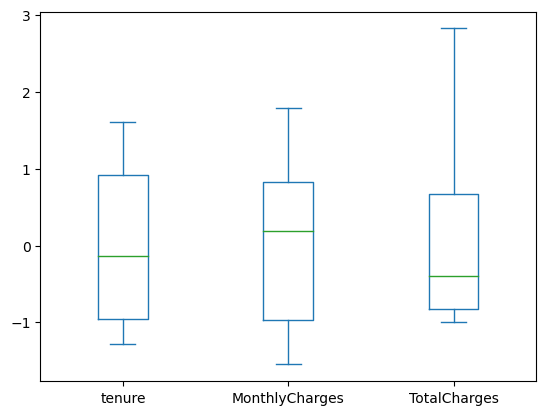

In [78]:
numcols_scaled.plot(kind='box')

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
minmax=MinMaxScaler()

In [82]:
numcols_minmax=minmax.fit_transform(numcols)

In [83]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [84]:
numcols_minmax.head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


<Axes: >

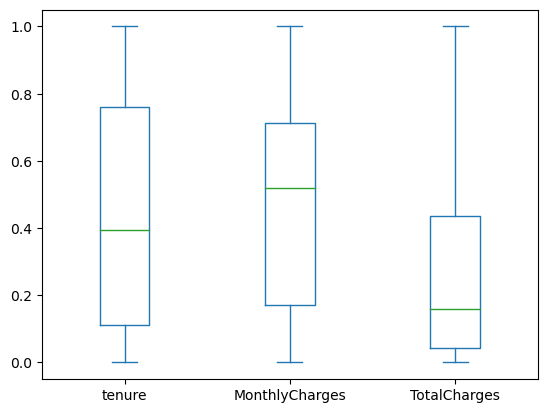

In [85]:
numcols_minmax.plot(kind='box')

In [86]:
from sklearn.preprocessing import RobustScaler

In [87]:
robust=RobustScaler()

In [88]:
numcols_robust=robust.fit_transform(numcols)

In [89]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [90]:
numcols_robust.head()

,tenure,MonthlyCharges,TotalCharges
0,-0.608696,-0.746200,-0.403038
1,0.108696,-0.246891,0.145000
2,-0.586957,-0.304007,-0.379963
3,0.347826,-0.516813,0.130633
4,-0.586957,0.006449,-0.367144


<Axes: >

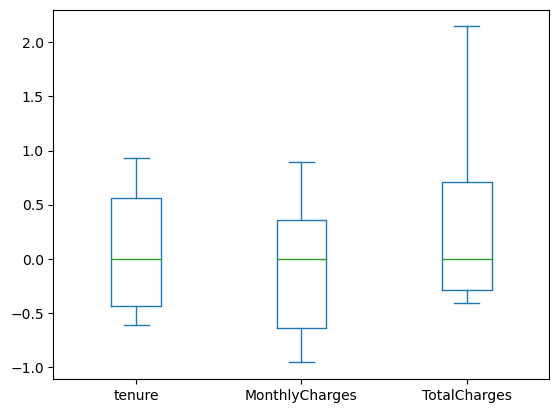

In [91]:
numcols_robust.plot(kind='box')

In [94]:
churndf_final=pd.concat([numcols_minmax,objcols_dummy],axis=1)

#One way to scale numerical variables is to apply the minmaX method. This method transforms the values of 
#each variable to a range between 0 and 1, preserving the original distribution. I have used the minmaX for 
#numerical variables for scaling in my data preprocessing step.

In [95]:
churndf_final=churndf_final.dropna()

In [96]:
y=churndf_final.Churn
X=churndf_final.drop('Churn',axis=1)

In [97]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.323944,0.662189,0.227521,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1.000000,0.845274,0.847461,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
7029,0.140845,0.112935,0.037809,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [98]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030     No
7031     No
Name: Churn, Length: 7021, dtype: object

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
y=LabelEncoder().fit_transform(y)

<Axes: xlabel='Churn'>

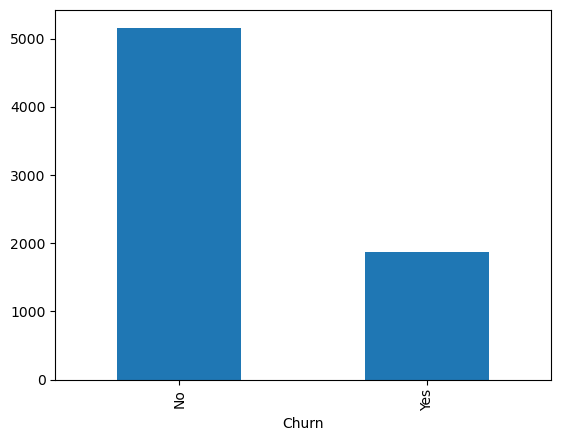

In [101]:
churndf.Churn.value_counts().plot(kind='bar')

In [102]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Logistice Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [106]:
logit=LogisticRegression(max_iter=1000)

In [107]:
logitmodel=logit.fit(X,y)

In [108]:
logitmodel.score(X,y)

0.7647914645974782

In [109]:
logitpredict=logitmodel.predict(X)

In [110]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,3704,1451
1,974,4181


In [111]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [112]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      5155
           1       0.74      0.81      0.78      5155

    accuracy                           0.76     10310
   macro avg       0.77      0.76      0.76     10310
weighted avg       0.77      0.76      0.76     10310



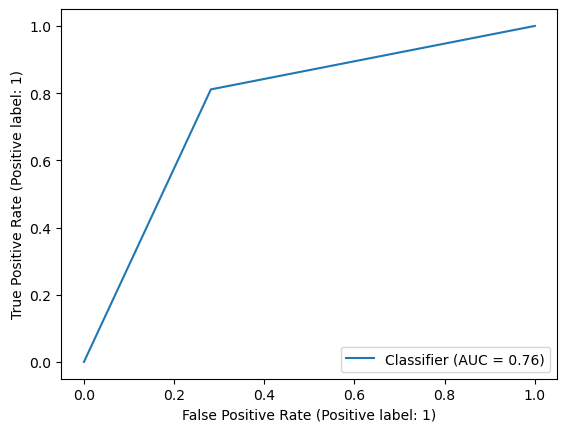

In [113]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [114]:
cross_val_score(logit,X,y)

array([0.76527643, 0.74442289, 0.76818623, 0.77255092, 0.77206596])

In [186]:
np.mean([0.76527643, 0.74442289, 0.76818623, 0.77255092, 0.77206596])

0.764500486

# Decission Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
tree=DecisionTreeClassifier(max_depth=10)

In [118]:
treemodel=tree.fit(X,y)

In [119]:
treemodel.score(X,y)

0.8446168768186227

In [120]:
treepredict=treemodel.predict(X)

In [121]:
pd.crosstab(y,treepredict)

col_0,0,1
row_0,,
0,4210,945
1,657,4498


In [122]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      5155
           1       0.83      0.87      0.85      5155

    accuracy                           0.84     10310
   macro avg       0.85      0.84      0.84     10310
weighted avg       0.85      0.84      0.84     10310



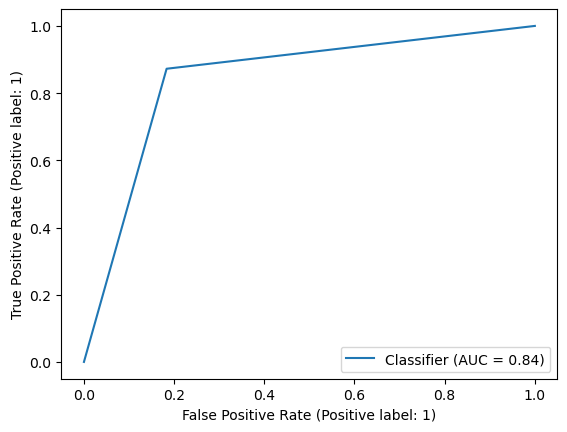

In [123]:
RocCurveDisplay.from_predictions(y,treepredict)

In [124]:
cross_val_score(tree,X,y)

array([0.74151309, 0.74927255, 0.8186227 , 0.82541222, 0.82298739])

In [187]:
np.mean([0.74151309, 0.74927255, 0.8186227 , 0.82541222, 0.82298739])

0.79156159

# Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
RF=RandomForestClassifier(max_depth=5,n_estimators=500)

In [128]:
RFmodel=RF.fit(X,y)

In [129]:
RFmodel.score(X,y)

0.7911736178467508

In [130]:
Ranpredict=RFmodel.predict(X)

In [131]:
pd.crosstab(y,Ranpredict)

col_0,0,1
row_0,,
0,3832,1323
1,830,4325


In [132]:
print(classification_report(y,Ranpredict))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      5155
           1       0.77      0.84      0.80      5155

    accuracy                           0.79     10310
   macro avg       0.79      0.79      0.79     10310
weighted avg       0.79      0.79      0.79     10310



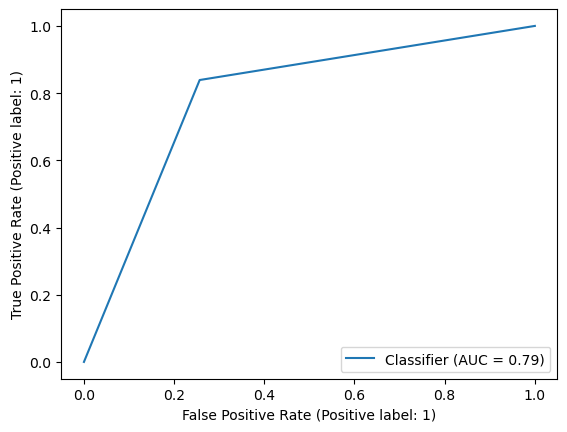

In [133]:
RocCurveDisplay.from_predictions(y,Ranpredict)

In [134]:
cross_val_score(RF,X,y)

array([0.7657614 , 0.74636275, 0.80504365, 0.80795344, 0.79825412])

In [188]:
np.mean([0.7657614 , 0.74636275, 0.80504365, 0.80795344, 0.79825412])

0.784675072

# Gradient Boosting Machine

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
gbc=GradientBoostingClassifier(max_depth=4,n_estimators=300)

In [138]:
gbcmodel=gbc.fit(X,y)

In [139]:
gbcmodel.score(X,y)

0.8920465567410282

In [140]:
gbcpredict=gbcmodel.predict(X)

In [141]:
pd.crosstab(y,gbcpredict)

col_0,0,1
row_0,,
0,4607,548
1,565,4590


In [142]:
print(classification_report(y,gbcpredict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5155
           1       0.89      0.89      0.89      5155

    accuracy                           0.89     10310
   macro avg       0.89      0.89      0.89     10310
weighted avg       0.89      0.89      0.89     10310



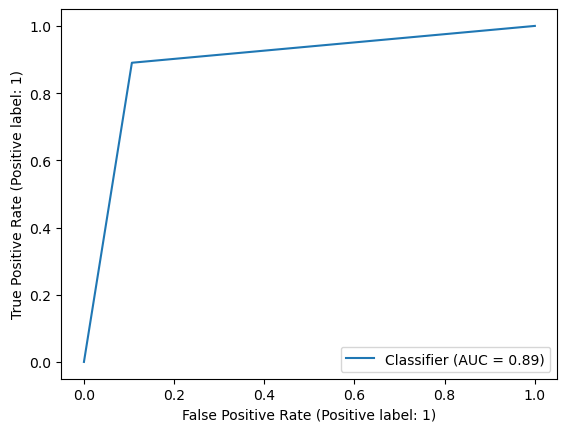

In [143]:
RocCurveDisplay.from_predictions(y,gbcpredict)

In [144]:
cross_val_score(gbc,X,y)

array([0.69350145, 0.74296799, 0.88457808, 0.89476237, 0.89233754])

In [189]:
np.mean([0.69350145, 0.74296799, 0.88457808, 0.89476237, 0.89233754])

0.821629486

# Naive Bayes

In [146]:
from sklearn.naive_bayes import MultinomialNB

In [147]:
mul=MultinomialNB()

In [148]:
mulmodel=mul.fit(X,y)

In [149]:
mulmodel.score(X,y)

0.7496605237633366

In [150]:
mulpredict=mulmodel.predict(X)

In [151]:
pd.crosstab(y,mulpredict)

col_0,0,1
row_0,,
0,3231,1924
1,657,4498


In [152]:
print(classification_report(y,mulpredict))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      5155
           1       0.70      0.87      0.78      5155

    accuracy                           0.75     10310
   macro avg       0.77      0.75      0.75     10310
weighted avg       0.77      0.75      0.75     10310



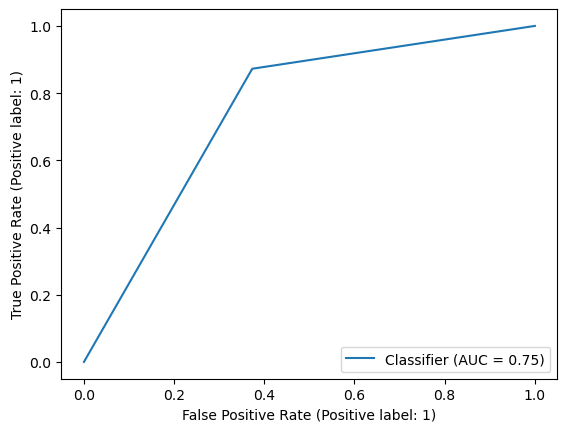

In [153]:
RocCurveDisplay.from_predictions(y,mulpredict)

In [154]:
cross_val_score(mul,X,y)

array([0.75072745, 0.7371484 , 0.75266731, 0.74927255, 0.75363725])

In [190]:
np.mean([0.75072745, 0.7371484 , 0.75266731, 0.74927255, 0.75363725])

0.7486905920000001

## Gaussian

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
nbg=GaussianNB()

In [158]:
nbgmodel=nbg.fit(X,y)

In [159]:
nbgmodel.score(X,y)

0.7540252182347236

In [160]:
nbgpredict=nbgmodel.predict(X)

In [161]:
pd.crosstab(y,nbgpredict)

col_0,0,1
row_0,,
0,3309,1846
1,690,4465


In [162]:
print(classification_report(y,nbgpredict))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72      5155
           1       0.71      0.87      0.78      5155

    accuracy                           0.75     10310
   macro avg       0.77      0.75      0.75     10310
weighted avg       0.77      0.75      0.75     10310



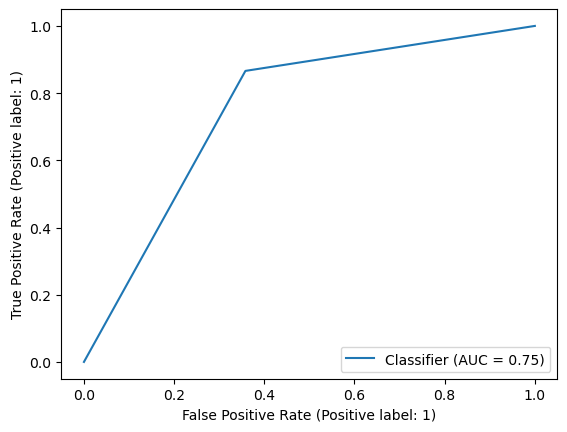

In [163]:
RocCurveDisplay.from_predictions(y,nbgpredict)

In [164]:
cross_val_score(nbg,X,y)

array([0.76042677, 0.73666343, 0.75751697, 0.75606208, 0.75800194])

In [191]:
np.mean([0.76042677, 0.73666343, 0.75751697, 0.75606208, 0.75800194])

0.7537342380000001

## Bernoulli's

In [166]:
from sklearn.naive_bayes import BernoulliNB

In [167]:
bb=BernoulliNB()

In [168]:
bbmodel=bb.fit(X,y)

In [169]:
bbmodel.score(X,y)

0.7590688651794374

In [170]:
bbpredict=bbmodel.predict(X)

In [171]:
pd.crosstab(y,bbpredict)

col_0,0,1
row_0,,
0,3403,1752
1,732,4423


In [172]:
print(classification_report(y,bbpredict))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73      5155
           1       0.72      0.86      0.78      5155

    accuracy                           0.76     10310
   macro avg       0.77      0.76      0.76     10310
weighted avg       0.77      0.76      0.76     10310



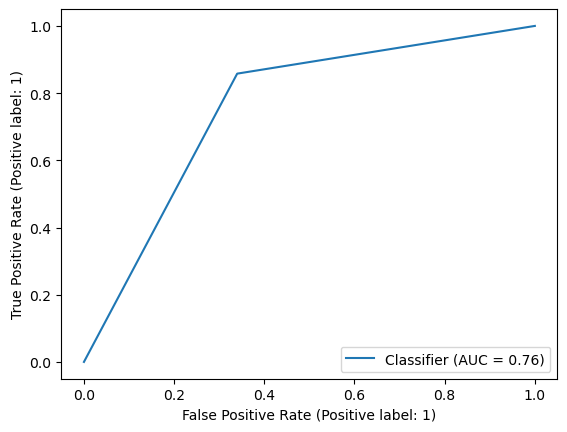

In [173]:
RocCurveDisplay.from_predictions(y,bbpredict)

In [174]:
cross_val_score(bb,X,y)

array([0.75848691, 0.73666343, 0.76818623, 0.76479146, 0.76333657])

In [192]:
np.mean([0.75848691, 0.73666343, 0.76818623, 0.76479146, 0.76333657])

0.7582929199999999

# SVC

In [176]:
from sklearn.svm import SVC

In [177]:
svc=SVC(C=3)

In [178]:
svcmodel=svc.fit(X,y)

In [179]:
svcmodel.score(X,y)

0.8652764306498545

In [180]:
svcpredict=svcmodel.predict(X)

In [181]:
pd.crosstab(y,svcpredict)

col_0,0,1
row_0,,
0,4319,836
1,553,4602


In [182]:
print(classification_report(y,svcpredict))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5155
           1       0.85      0.89      0.87      5155

    accuracy                           0.87     10310
   macro avg       0.87      0.87      0.87     10310
weighted avg       0.87      0.87      0.87     10310



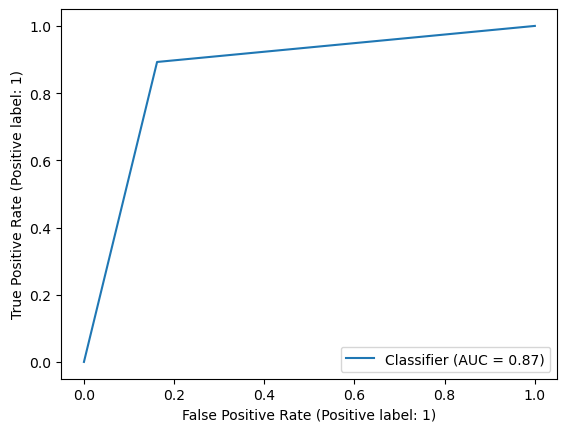

In [183]:
RocCurveDisplay.from_predictions(y,svcpredict)

In [184]:
cross_val_score(svc,X,y)

array([0.75897187, 0.77400582, 0.83753637, 0.84238603, 0.85354025])

In [193]:
np.mean([0.75897187, 0.77400582, 0.83753637, 0.84238603, 0.85354025])

0.813288068

# Summary

The following text is a summary of the analysis of the Telecom churn dataset using different machine learning algorithms. The analysis compared the performance of each algorithm on four metrics: ML model score, recall, ROC/AUC curve value and cross validation score.

The table below shows the results of the analysis:

| Model | ML model Score | recall|ROC/AUC curve values| Cross Valdiation Score|
|:------|:--------------:|:-------------:|:------:|:------:|
|Logistic Regression|0.7647914645974782|0.72|0.76|0.764500486|
|Decision tree|0.8446168768186227|0.82|0.84|0.79156159|
|Random Forest|0.7911736178467508|0.74|0.79|0.784675072|
|***Gradient boosting machines***|***0.8920465567410282***|***0.89***|***0.89***|***0.821629486***|
|Multinomial Naive Bayes|0.7496605237633366|0.63|0.75|0.7537342380000001|
|Gaussian Naive Bayes|0.7540252182347236|0.64|0.75|0.7537342380000001|
|Bernoulli Naive Bayes|0.7590688651794374|0.66|0.76|0.7582929199999999|
|Support Vector Classifier|0.8652764306498545|0.84|0.87|0.813288068|

According to the table, the best performing algorithm for the Telecom churn dataset is Gradient Boosting Machines, which achieved the highest values for all four metrics. This indicates that it might be a good choice for predicting telecom churn based on the given dataset.

ROC/AUC curve value is a metric that measures how well a binary classifier can distinguish between two classes, such as churned and not churned customers. ROC stands for receiver operating characteristic, and it plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold levels. AUC stands for area under the curve, and it summarizes the overall performance of the classifier by calculating the area under the ROC curve. A higher AUC value means that the classifier can better separate the two classes, and a perfect classifier would have an AUC value of 1.

### Model Performance Summary

Gradient Boosting Machines (GBM) emerged as the top-performing model, exhibiting high scores across all metrics.

Logistic Regression, Decision Tree, Random Forest, and Support Vector Classifier (SVC) also demonstrated competitive performance.

Naive Bayes models (Multinomial, Gaussian, Bernoulli) showed slightly lower performance compared to other models.

### Conclusion

The project concludes that Gradient Boosting Machines is the most suitable model for predicting customer churn in the telecom dataset. The thorough exploration of the dataset, careful preprocessing, and a variety of model evaluations contribute to the robustness of the analysis.